# ONTARIO Population COVID-19 Data set from: [data.ontario.ca](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)

### Import Required LIbraries

In [37]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

### Import the data set from a url

In [11]:
url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'

df = pd.read_csv(url)

df.tail()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
100785,100786,2020-10-06,2020-10-14,2020-10-14,2020-10-11,30s,MALE,CC,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
100786,100787,2020-11-03,2020-11-05,2020-11-05,2020-11-04,60s,FEMALE,OB,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
100787,100788,2020-03-18,2020-04-07,2020-04-07,2020-04-06,30s,FEMALE,CC,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
100788,100789,2020-09-07,2020-09-17,2020-09-17,2020-09-17,40s,MALE,CC,Resolved,NaN,Wellington-Dufferin-Guelph Public Health,160 Chancellors Way,Guelph,N1G 0E1,www.wdgpublichealth.ca,43.524881,-80.233743
100789,100790,2020-09-11,2020-09-13,2020-09-13,2020-09-11,30s,MALE,CC,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [12]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))
print(max(df['Test_Reported_Date']))

2020-01-27 00:00:00
2020-11-19 00:00:00


## Filter the Test Reported Date to June 1, 2020 > Last Reported Date

In [13]:
start_date = '2020-06-01'
df = df[df['Test_Reported_Date'] >= start_date] 

In [14]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))

2020-06-01 00:00:00


In [17]:
df['Age_Group'].unique()

array(['30s', '50s', '20s', '40s', '<20', '60s', '80s', '70s', '90s', nan,
       'UNKNOWN'], dtype=object)

In [29]:
df_age20andbelow = df[df['Age_Group'] == '<20']

In [30]:
df2 = df_age20andbelow[["Test_Reported_Date", "Age_Group", "Reporting_PHU_City"]]

In [31]:
df2.head()

,Test_Reported_Date,Age_Group,Reporting_PHU_City
11,2020-11-08,<20,St. Thomas
22,2020-11-12,<20,St. Thomas
41,2020-11-18,<20,St. Thomas
42,2020-10-25,<20,St. Thomas
44,2020-11-09,<20,St. Thomas


In [42]:
df2["Case"] = 1
df2 = df2[['Test_Reported_Date', 'Case']]
df2.head()

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Test_Reported_Date,Case
11,2020-11-08,1
22,2020-11-12,1
41,2020-11-18,1
42,2020-10-25,1
44,2020-11-09,1


In [35]:
df3 = df2.groupby(['Test_Reported_Date'])['Case'].agg('sum')
df3.tail(20)

Test_Reported_Date
2020-10-31    129
2020-11-01    169
2020-11-02    165
2020-11-03    148
2020-11-04    143
2020-11-05    192
2020-11-06    191
2020-11-07    150
2020-11-08    215
2020-11-09    223
2020-11-10    233
2020-11-11    219
2020-11-12    234
2020-11-13    212
2020-11-14    178
2020-11-15    193
2020-11-16    212
2020-11-17    149
2020-11-18    218
2020-11-19     64
Name: Case, dtype: int64

Text(0.5, 1.0, 'Daily Sum of COVID-19 Cases in ONTARIO\n Individuals <20 years')

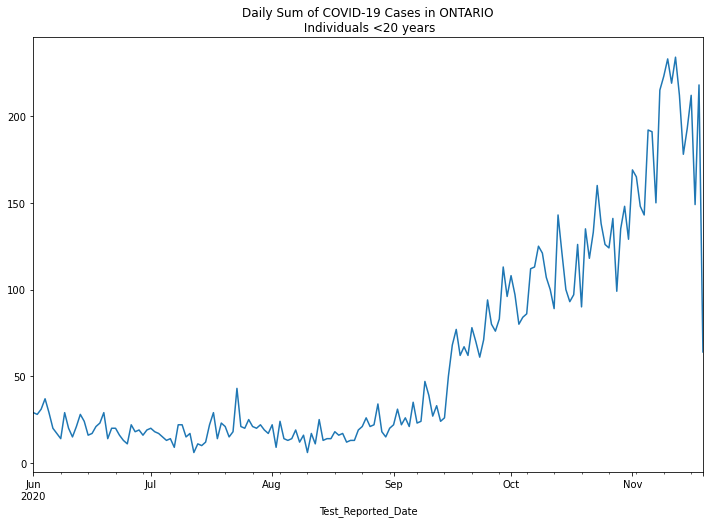

In [53]:
plt.figure(figsize=(12,8))

df3.plot()
plt.title("Daily Sum of COVID-19 Cases in ONTARIO\n Individuals <20 years")

In [59]:
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df4 = df2.set_index(datetime_index)
df4.drop('Test_Reported_Date', axis=1, inplace=True)
df4 = df4.sort_index()
df4.tail()

,Case
2020-11-19,1
2020-11-19,1
2020-11-19,1
2020-11-19,1
2020-11-19,1


In [68]:
weekly_sum = df4['Case'].resample("W").sum()
weekly_sum.tail()

2020-10-25     900
2020-11-01     945
2020-11-08    1204
2020-11-15    1492
2020-11-22     643
Freq: W-SUN, Name: Case, dtype: int64

<AxesSubplot:>

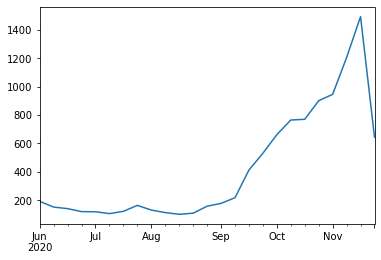

In [69]:
weekly_sum.plot()

In [65]:
df5 = df4.groupby(df4.index)['Case'].sum()

In [66]:
df5.head()

2020-06-01    29
2020-06-02    28
2020-06-03    31
2020-06-04    37
2020-06-05    29
Name: Case, dtype: int64

<AxesSubplot:>

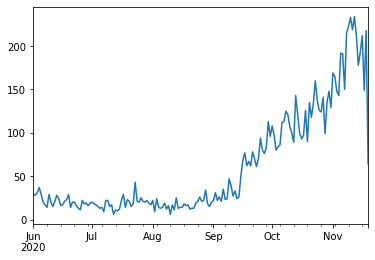

In [67]:
df5.plot()

<AxesSubplot:>

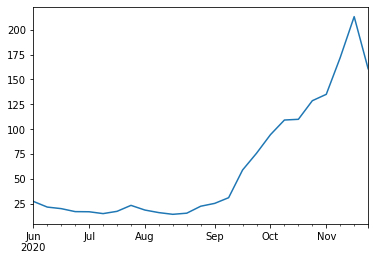

In [82]:
#df5 = pd.DataFrame(df5)
weekly_mean = df5['Case'].resample("W").mean()
weekly_mean.plot()

In [83]:
weekly_mean.tail(10)

2020-09-20     58.857143
2020-09-27     75.714286
2020-10-04     94.428571
2020-10-11    109.142857
2020-10-18    109.857143
2020-10-25    128.571429
2020-11-01    135.000000
2020-11-08    172.000000
2020-11-15    213.142857
2020-11-22    160.750000
Freq: W-SUN, Name: Case, dtype: float64